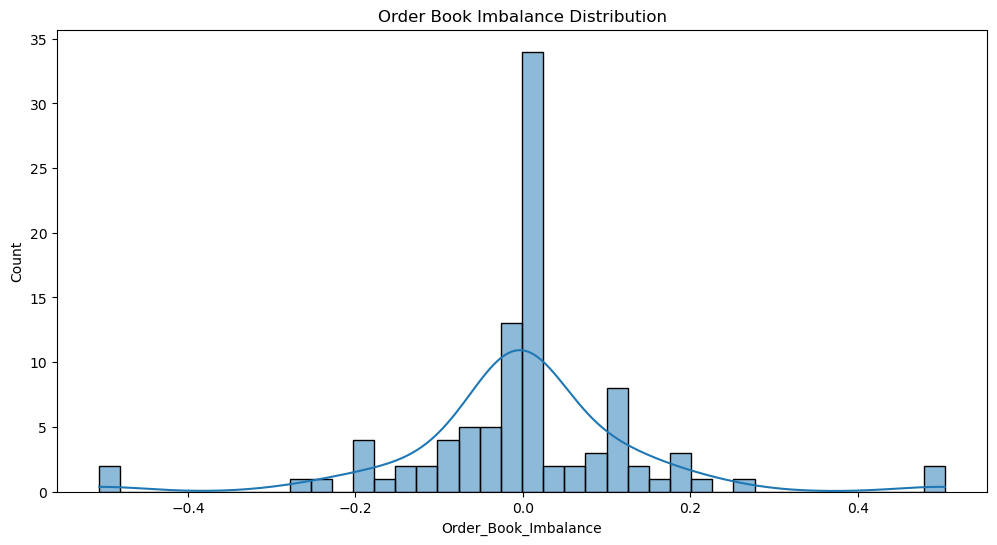

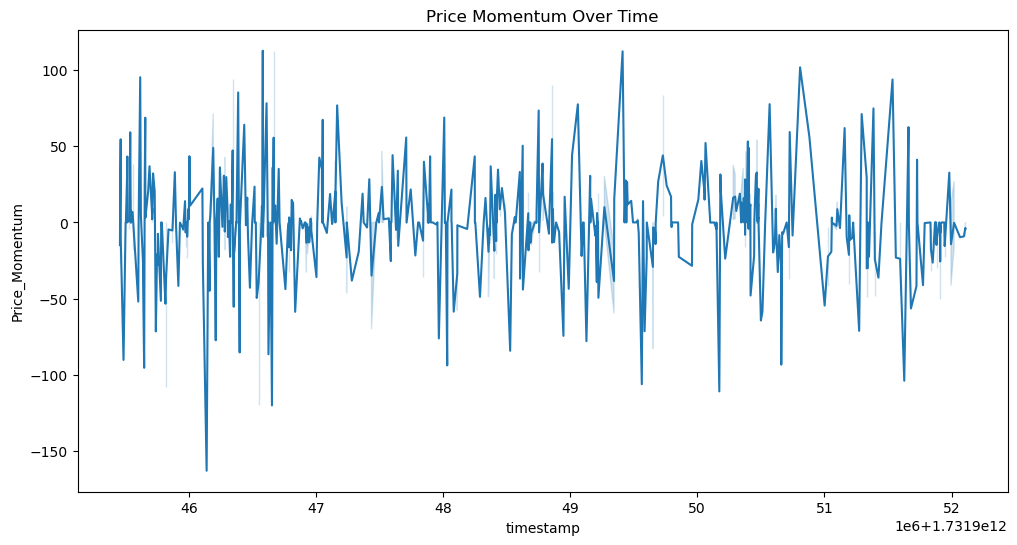

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00        61

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy: 1.0


AttributeError: 'int' object has no attribute 'to_pydatetime'

In [30]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ccxt  # To get order book and tick data from exchanges
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import backtrader as bt

# Step 1: Collecting Data
# Example using CCXT for cryptocurrency order book data
exchange = ccxt.kraken()
order_book = exchange.fetch_order_book('BTC/USDT')

# Collecting tick data (trades)
tick_data = exchange.fetch_trades('BTC/USDT')

# Convert to DataFrame
order_book_df = pd.DataFrame(order_book['bids'], columns=['Price', 'Volume', 'Timestamp'])
tick_data_df = pd.DataFrame(tick_data)

# Step 2: Preprocessing the Data
# Cleaning the order book data
order_book_df.dropna(inplace=True)

# Feature engineering
# Calculating Order Book Imbalance (difference between bid and ask volume)
order_book_df['Order_Book_Imbalance'] = order_book_df['Volume'] - order_book_df['Volume'].shift(-1)

# Adding a price momentum indicator
tick_data_df['Price_Momentum'] = tick_data_df['price'].diff()

# Adding an order flow feature
tick_data_df['Order_Flow'] = np.where(tick_data_df['side'] == 'buy', tick_data_df['amount'], -tick_data_df['amount'])

# Step 3: Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.histplot(order_book_df['Order_Book_Imbalance'], kde=True)
plt.title('Order Book Imbalance Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=tick_data_df, x='timestamp', y='Price_Momentum')
plt.title('Price Momentum Over Time')
plt.show()

# Step 4: Model Development
# Creating labels for price prediction
# Define a threshold to classify as up/down movement
tick_data_df['Label'] = np.where(tick_data_df['Price_Momentum'] > 0, 1, 0)
tick_data_df.fillna(method='ffill', inplace=True) 
# Preparing the dataset for training
features = ['price', 'Order_Flow', 'Price_Momentum']
X = tick_data_df[features].dropna()
y = tick_data_df['Label'].loc[X.index]

# Proceed with train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 5: Model Evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

# Step 6: Backtesting
class MyStrategy(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close

    def next(self):
        if self.dataclose[0] < self.dataclose[-1]:
            if self.position.size == 0:
                self.buy()
        elif self.dataclose[0] > self.dataclose[-1]:
            if self.position.size > 0:
                self.sell()

cerebro = bt.Cerebro()
data = bt.feeds.PandasData(dataname=tick_data_df)
cerebro.adddata(data)
cerebro.addstrategy(MyStrategy)

# Adding broker settings for realistic backtesting
cerebro.broker.set_cash(10000)
cerebro.broker.setcommission(commission=0.001)

# Running the backtest
cerebro.run()
cerebro.plot()



In [31]:
print(tick_data_df.isnull().sum())

id                   0
order             1000
info                 0
timestamp            0
datetime             0
symbol               0
type                 0
side                 0
takerOrMaker      1000
price                0
amount               0
cost                 0
fee                  0
fees                 0
Price_Momentum       1
Order_Flow           0
Label                0
dtype: int64


In [34]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ccxt  # To get order book and tick data from exchanges
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import backtrader as bt

# Step 1: Collecting Data
# Example using CCXT for cryptocurrency order book data
exchange = ccxt.kraken()
try:
    order_book = exchange.fetch_order_book('BTC/USDT')
    tick_data = exchange.fetch_trades('BTC/USDT')
except ccxt.NetworkError as e:
    print(f"Network error occurred: {e}")
    order_book = {'bids': []}
    tick_data = []
except ccxt.ExchangeError as e:
    print(f"Exchange error occurred: {e}")
    order_book = {'bids': []}
    tick_data = []

# Convert to DataFrame
if order_book['bids']:
    order_book_df = pd.DataFrame(order_book['bids'], columns=['Price', 'Volume'])
else:
    order_book_df = pd.DataFrame(columns=['Price', 'Volume'])

if tick_data:
    tick_data_df = pd.DataFrame(tick_data)
    if all(key in tick_data_df.columns for key in ['timestamp', 'price', 'amount', 'side']):
        tick_data_df = tick_data_df[['timestamp', 'price', 'amount', 'side']]
else:
    tick_data_df = pd.DataFrame(columns=['timestamp', 'price', 'amount', 'side'])

# Step 2: Preprocessing the Data
# Cleaning the order book data
order_book_df.dropna(inplace=True)

# Feature engineering
# Calculating Order Book Imbalance (difference between bid and ask volume)
if not order_book_df.empty:
    order_book_df['Order_Book_Imbalance'] = order_book_df['Volume'] - order_book_df['Volume'].shift(-1)

# Adding a price momentum indicator
if 'price' in tick_data_df.columns:
    tick_data_df['Price_Momentum'] = tick_data_df['price'].diff()

# Adding an order flow feature
if 'side' in tick_data_df.columns and 'amount' in tick_data_df.columns:
    tick_data_df['Order_Flow'] = np.where(tick_data_df['side'] == 'buy', tick_data_df['amount'], -tick_data_df['amount'])

# Step 3: Exploratory Data Analysis (EDA)
if not order_book_df.empty:
    plt.figure(figsize=(12, 6))
    sns.histplot(order_book_df['Order_Book_Imbalance'], kde=True)
    plt.title('Order Book Imbalance Distribution')
    plt.show()

if 'Price_Momentum' in tick_data_df.columns and not tick_data_df.empty:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=tick_data_df, x='timestamp', y='Price_Momentum')
    plt.title('Price Momentum Over Time')
    plt.show()

# Step 4: Model Development
# Creating labels for price prediction
if 'Price_Momentum' in tick_data_df.columns:
    tick_data_df['Label'] = np.where(tick_data_df['Price_Momentum'] > 0, 1, 0)
    tick_data_df.fillna(method='ffill', inplace=True)

# Preparing the dataset for training
if not tick_data_df.empty:
    features = ['price', 'Order_Flow', 'Price_Momentum']
    if all(feature in tick_data_df.columns for feature in features):
        X = tick_data_df[features].dropna()
        y = tick_data_df['Label'].loc[X.index]

        # Proceed with train-test split and model training
        if not X.empty and not y.empty:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Training a Random Forest Classifier with hyperparameter tuning
            param_grid = {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5, 10]
            }
            grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)
            grid_search.fit(X_train, y_train)
            clf = grid_search.best_estimator_

            # Step 5: Model Evaluation
            y_pred = clf.predict(X_test)
            print(classification_report(y_test, y_pred))
            print('Accuracy:', accuracy_score(y_test, y_pred))

# Step 6: Backtesting
if not tick_data_df.empty:
    class MyStrategy(bt.Strategy):
        def __init__(self):
            self.dataclose = self.datas[0].close

        def next(self):
            if len(self) > 1:  # Ensure there is enough data to reference previous values
                if self.dataclose[0] < self.dataclose[-1]:
                    if self.position.size == 0:
                        self.buy()
                elif self.dataclose[0] > self.dataclose[-1]:
                    if self.position.size > 0:
                        self.sell()

    cerebro = bt.Cerebro()
    if 'price' in tick_data_df.columns:
        tick_data_df.rename(columns={'price': 'close'}, inplace=True)
    if 'close' in tick_data_df.columns:
        tick_data_df['datetime'] = pd.to_datetime(tick_data_df['timestamp'], unit='ms', errors='coerce')
        tick_data_df.dropna(subset=['datetime'], inplace=True)
        tick_data_df.set_index('datetime', inplace=True)
        tick_data_df['open'] = tick_data_df['close']  # Adding open price for compatibility
        tick_data_df['high'] = tick_data_df['close']  # Adding high price for compatibility
        tick_data_df['low'] = tick_data_df['close']  # Adding low price for compatibility
        tick_data_df['volume'] = tick_data_df['amount']  # Adding volume for compatibility
        tick_data_df = tick_data_df[['open', 'high', 'low', 'close', 'volume']]  # Ensuring only required columns are present
        tick_data_df.reset_index(inplace=True)  # Reset index to avoid datetime issues with Backtrader
        tick_data_df['datetime'] = pd.to_datetime(tick_data_df['datetime'])  # Ensure datetime is in the correct format
        data = bt.feeds.PandasData(dataname=tick_data_df, datetime='datetime', open='open', high='high', low='low', close='close', volume='volume', nocache=True)
        cerebro.adddata(data)
        cerebro.addstrategy(MyStrategy)

        # Adding broker settings for realistic backtesting
        cerebro.broker.set_cash(10000)
        cerebro.broker.setcommission(commission=0.001)

        # Running the backtest
        cerebro.run()
        cerebro.plot()

# Step 7: Optimization and Reporting
# Hyperparameter tuning was performed using GridSearchCV
if 'cv_results_' in dir(grid_search):
    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df.to_csv('model_optimization_results.csv', index=False)


ValueError: 2 columns passed, passed data had 3 columns